# Football Data Analysis

### Importing international football data from year 1872 - 2022  

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_loc = r"C:\Users\Jotaro Kujo\Desktop\Studies\Foot Ball Data\results.csv"
df = pd.read_csv(file_loc)
df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


### Adding a column to show the winning team

In [7]:
def categorise(row):
    if row['home_score'] > row['away_score']:
        return row['home_team']
    elif row['home_score'] < row['away_score']:
        return row['away_team']
    else :
        return 'Inconclusive'
df['winner'] = df.apply(lambda row: categorise(row), axis=1)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Inconclusive
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Inconclusive
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


### Finding the number of games won by England each year

In [8]:
# Filtering out only games played by England

rd = df.loc[(df['home_team'] == "England") | (df['away_team'] == "England")]

# Removing all the friendly games and games that were tied

rd = rd.loc[(rd['tournament'] != "Friendly") & (rd['winner'] != "Inconclusive")]

In [9]:
def categorise(row):
    if row['winner'] == "England":
        return 1
    else :
        return 0
rd['res'] = rd.apply(lambda row: categorise(row), axis=1)

#Adding a column to show only years
rd['year'] = rd['date'].astype(str).str[:4]


rd.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,res,year
31,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Ireland,False,England,1,1884
32,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,Scotland,0,1884
33,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,England,1,1884
35,1885-02-28,England,Northern Ireland,4,0,British Championship,Manchester,England,False,England,1,1885
43,1886-03-13,Northern Ireland,England,1,6,British Championship,Belfast,Ireland,False,England,1,1886


### Plotting the no. of wins for each year

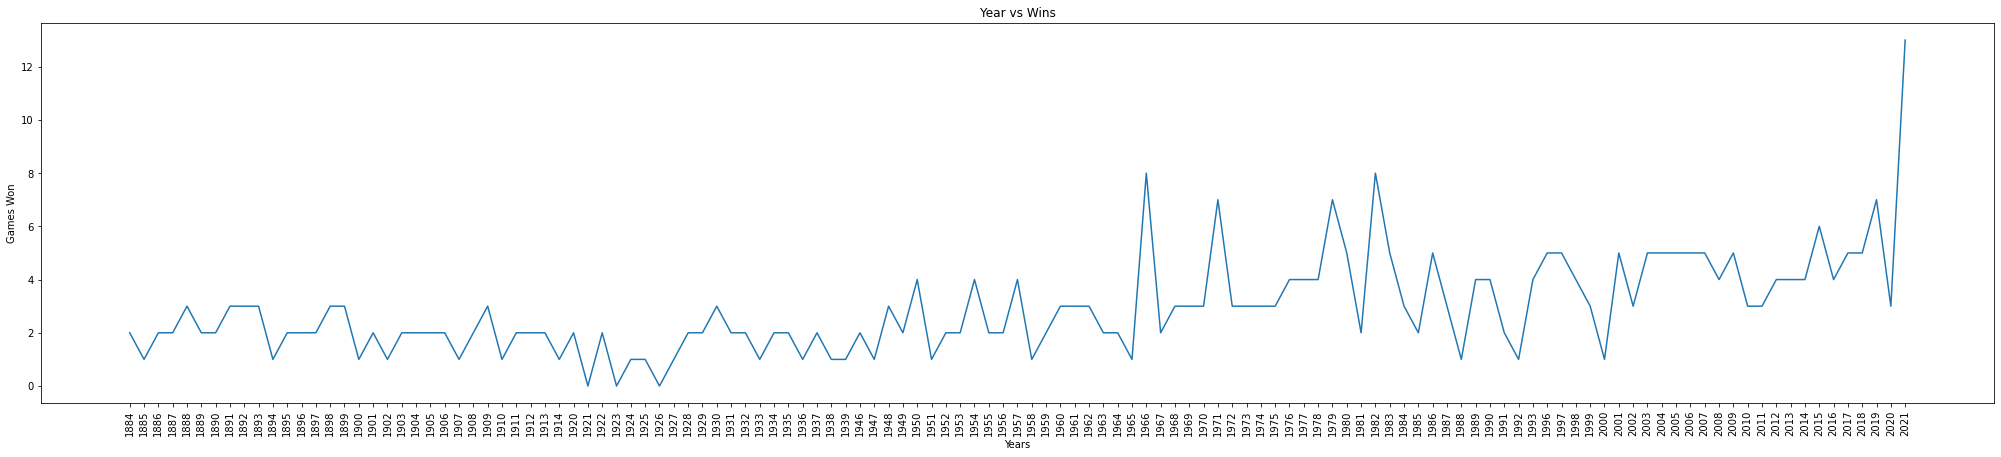

In [10]:
# Taking year and game then Grouping by years
no_of_games = []
# Finding the no of games in each year
no_of_games=rd['year'].value_counts()

year = rd['year']
year = year.unique()
won = rd.groupby(['year']).sum()

# Plotting the no. of games won each year

plt.figure(figsize=(35, 7))
plt.plot(year,won['res'])
plt.title('Year vs Wins')
plt.xlabel('Years')
plt.xticks(rotation=90)
plt.ylabel('Games Won')
plt.show()

### Calculating and plotting the win percentage of England for every year

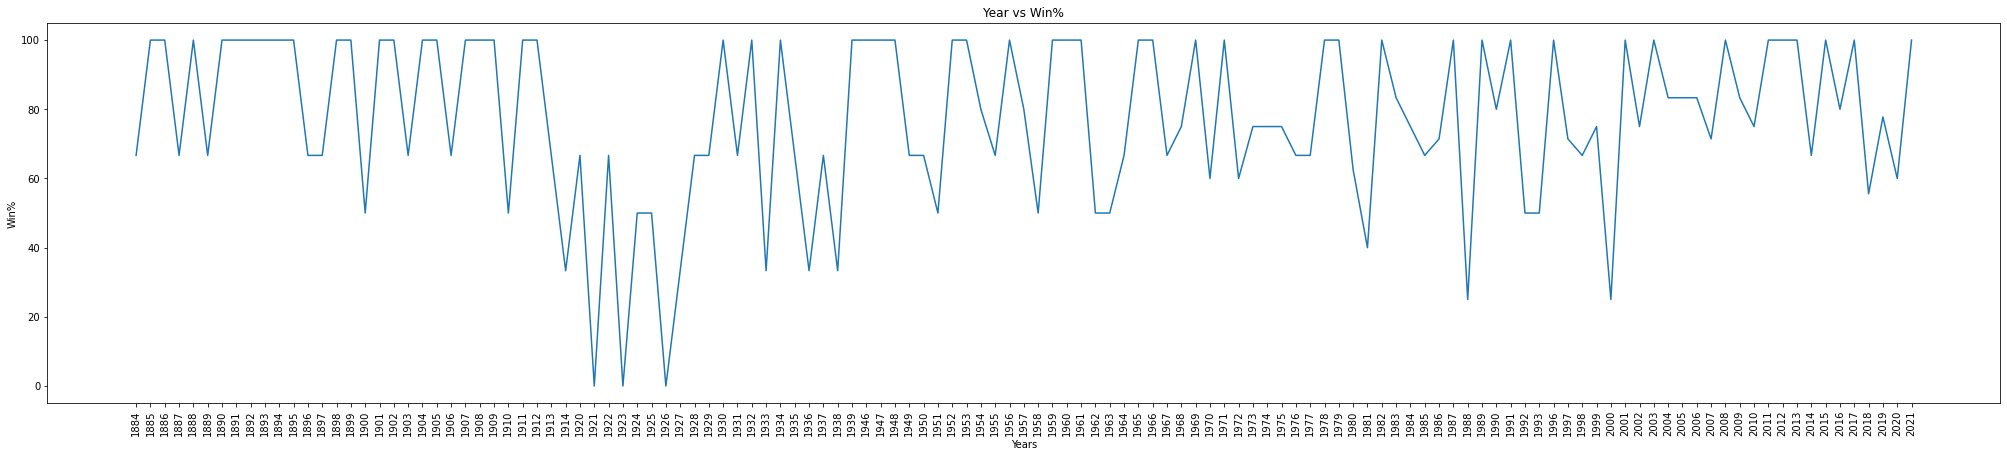

In [11]:
winpct=[]
no_of_games = no_of_games.sort_index()
for i in range(len(no_of_games)):
    winpct.append(won['res'][i]*100/int(no_of_games[i]))

plt.figure(figsize=(35, 7))
plt.plot(year,winpct)
plt.title('Year vs Win%')
plt.xlabel('Years')
plt.xticks(rotation=90)
plt.ylabel('Win%')
plt.show()